In [1]:
#importing the libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


#import the data  
data=pd.read_csv(r"c:\Users\User\Downloads\electronics_cleaned.csv")

#first five column of data 
data.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split,month
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0,6
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0,6
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0,6
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0,7
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0,7


In [2]:
#shape 
data.shape

(1292954, 11)

In [3]:
## let cheak the data type of  all columns and along with finding wheather they contain null value or not 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
 10  month       1292954 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 108.5+ MB


In [4]:
##we see that columne brand ,category , user id , item id has object data type but it is string so we change it into string
data['brand']=data['brand'].astype(str)

data['item_id']=data['item_id'].astype(str)

data['user_id']=data['user_id'].astype(str)

data['category']=data['category'].astype(str)

## now we  see that column rating has int69 data type but its actually float  so we change it to as float 
data['rating']=data['rating'].astype(float)


##now we see that column timestamp is obect but it actually timestamp so we convert it into timestamp 
from datetime import datetime
data['timestamp']=pd.to_datetime(data['timestamp'])

In [5]:
data

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split,month
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,nan,1999,NaN,0,6
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,nan,1999,NaN,0,6
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,nan,1999,NaN,0,6
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,nan,1999,NaN,0,7
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,nan,1999,NaN,0,7
...,...,...,...,...,...,...,...,...,...,...,...
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2018,NaN,0,9
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,nan,2018,NaN,0,9
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,nan,2018,NaN,0,9
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,nan,2018,NaN,0,9


In [6]:
#for better understand of data
data.describe()

,rating,timestamp,year,split,month
count,1.292954e+06,1292954,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.051482e+00,2015-06-18 11:30:34.851355904,2.014977e+03,1.747587e-01,6.340661e+00
min,1.000000e+00,1999-06-13 00:00:00,1.999000e+03,0.000000e+00,1.000000e+00
25%,4.000000e+00,2014-09-06 00:00:00,2.014000e+03,0.000000e+00,3.000000e+00
50%,5.000000e+00,2015-10-19 00:00:00,2.015000e+03,0.000000e+00,6.000000e+00
75%,5.000000e+00,2016-10-19 00:00:00,2.016000e+03,0.000000e+00,9.000000e+00
max,5.000000e+00,2018-10-01 00:00:00,2.018000e+03,2.000000e+00,1.200000e+01
std,1.379732e+00,NaN,2.117867e+00,5.506810e-01,3.576262e+00


In [7]:
#now we see the no of unique user and item in data 
data.nunique()

item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              51
year               20
user_attr           2
split               3
month              12
dtype: int64

In [8]:
#cheaking duplicates_value
data.duplicated().sum()

np.int64(0)

In [9]:
#cheaking missing value
data.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand               0
year                0
user_attr     1118830
split               0
month               0
dtype: int64

In [10]:
##as we see there is one columne user_attr  which is not important so we drop this column 
data.drop(['user_attr'],inplace=True,axis=1)

In [11]:
## let us see the distributions of rating 
data.rating.value_counts()

rating
5.0    755755
4.0    214166
1.0    143755
3.0    100630
2.0     78648
Name: count, dtype: int64

In [12]:
data

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,split,month
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,nan,1999,0,6
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,nan,1999,0,6
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,nan,1999,0,6
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,nan,1999,0,7
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,nan,1999,0,7
...,...,...,...,...,...,...,...,...,...,...
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2018,0,9
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,nan,2018,0,9
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,nan,2018,0,9
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,nan,2018,0,9


In [15]:
print(yearly_perfomance.columns)

Index(['feat_year', 'count'], dtype='object')


here we see that most of the rating is 5

# Q : what is  best year of sale ?

In [14]:
#here we cheak the  best year of sale 
data['feat_year']=pd.DatetimeIndex(data['timestamp']).year

yearly_perfomance=data['feat_year'].value_counts()

yearly_perfomance = pd.DataFrame(yearly_perfomance.reset_index())
yearly_perfomance.rename(columns={'index': 'year'}, inplace=True)



In [16]:
##plot _useing barplot
plt.figure(figsize=(15,7))



<Figure size 1500x700 with 0 Axes>

<Figure size 1500x700 with 0 Axes>

In [17]:
print(yearly_perfomance)

    feat_year   count
0        2015  320887
1        2016  302619
2        2017  192477
3        2014  180676
4        2013   99855
5        2018   80229
6        2012   38389
7        2011   23894
8        2010   16888
9        2009   12804
10       2008    9428
11       2007    6798
12       2006    2614
13       2005    2170
14       2004    1275
15       2003     833
16       2002     481
17       2001     403
18       2000     187
19       1999      47


<Axes: xlabel='count', ylabel='feat_year'>

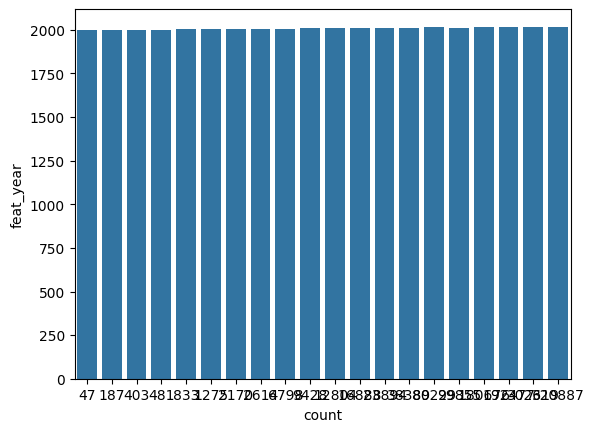

In [18]:
sns.barplot(data = yearly_perfomance, x="count" ,y="feat_year")

here wee see that 2015 has maximum numbr of sale  now we  find the month that  maximum number of sale

## Q : what is best Month of sale ?

<Axes: xlabel='count', ylabel='feat_month'>

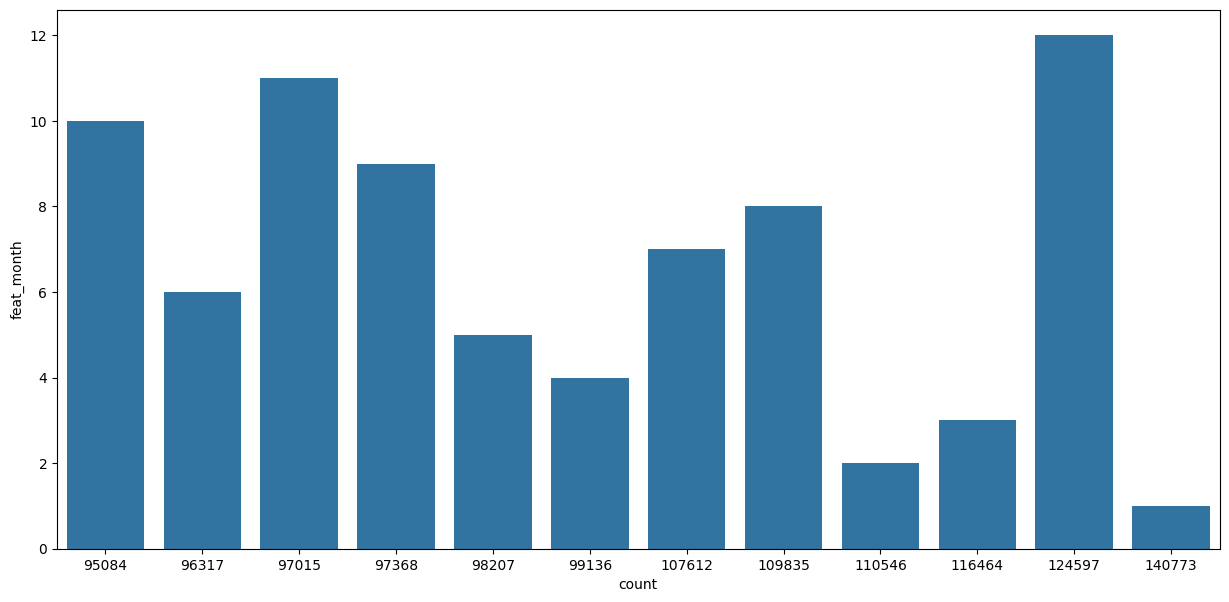

In [19]:
data['feat_month']=pd.DatetimeIndex(data['timestamp']).month


monthly_perfomance =data['feat_month'].value_counts()

monthly_perfomance=pd.DataFrame(monthly_perfomance.reset_index().rename(columns={'index':'month'}))

##plot _useing barplot
plt.figure(figsize=(15,7))

sns.barplot(data=monthly_perfomance, x="count" ,y="feat_month")



here we sew that january was the best month for sale 

## Q : what is most given rating?

<Axes: xlabel='rating', ylabel='count'>

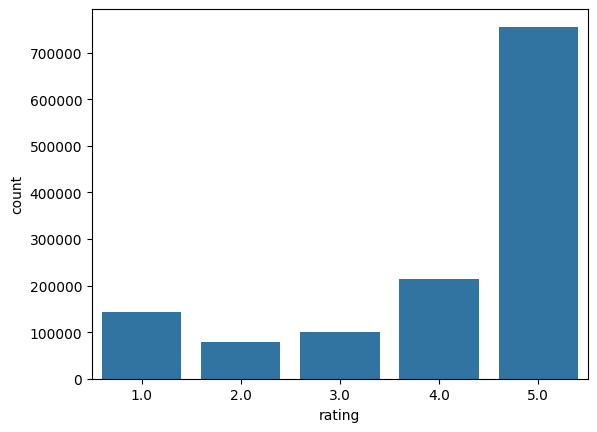

In [20]:
##find the idstribution of rating
sns.countplot(x='rating',data=data)

#Q :which  brand have high sales ?

In [73]:
Brand=pd.DataFrame(data['brand'].value_counts().reset_index())
Brand=Brand.drop([0, 1])
print(Brand.columns)
# Index(['brand_name', 'count'], dtype='object')



Index(['brand', 'count'], dtype='object')


In [74]:
Brand=Brand.rename(columns={'count':'name'})

In [75]:
Brand

,brand,name
2,Logitech,29203
3,Sony,20360
4,Mpow,17477
5,EldHus,16530
6,Sennheiser,13322
7,Fujifilm,12245
8,TaoTronics,12125
9,Etre Jeune,11753
10,Pyle,11606
11,JLAB,10079


Index(['item_id', 'user_id', 'rating', 'timestamp', 'model_attr', 'category',
       'brand', 'year', 'split', 'month', 'feat_year', 'feat_month'],
      dtype='object')


<Axes: xlabel='brand', ylabel='name'>

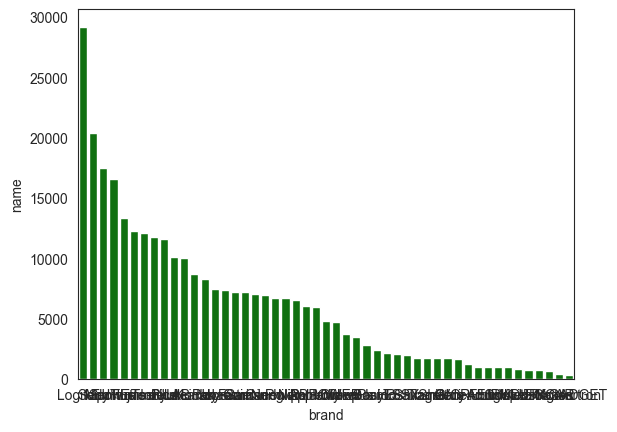

In [77]:
print(data.columns)
sns.barplot(x='brand',y='name',data=Brand, color='green')


## Q: which brand have least sale?

<Axes: ylabel='brand'>

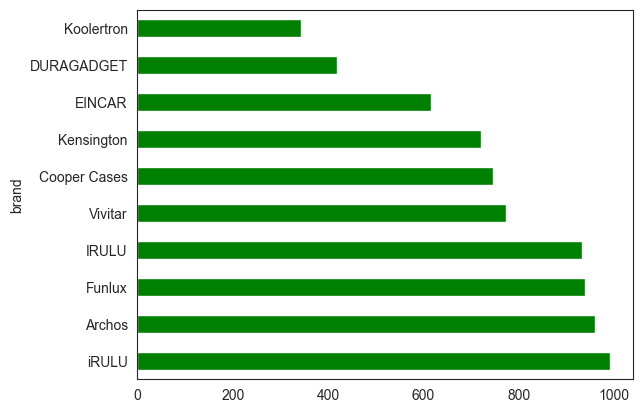

In [89]:
Brand.tail(10).set_index('brand')['name'].plot(
    kind='barh',
    color='green'
)


## Q  :   Find the brands with the most sales in 2015

<Axes: xlabel='brand', ylabel='count'>

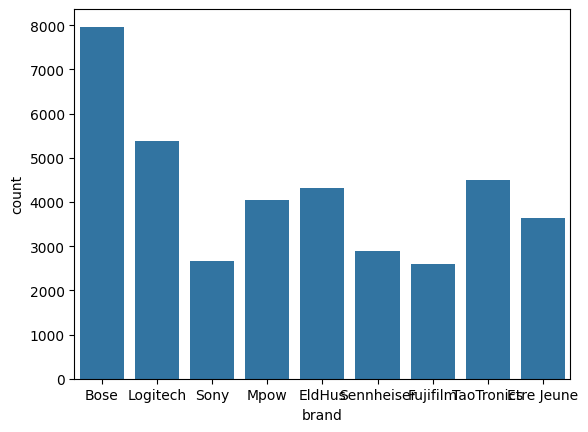

In [39]:
#plot useing seborn 
sns.countplot(x='brand', data=data[data['year'] == 2016], order=data['brand'].value_counts().iloc[1:10].index)

as we see bose has maximum no of sale in 2015


#Q :  which category with the least sales was Security & Surveillance while the most sales were Headphones.


<Axes: ylabel='rating'>

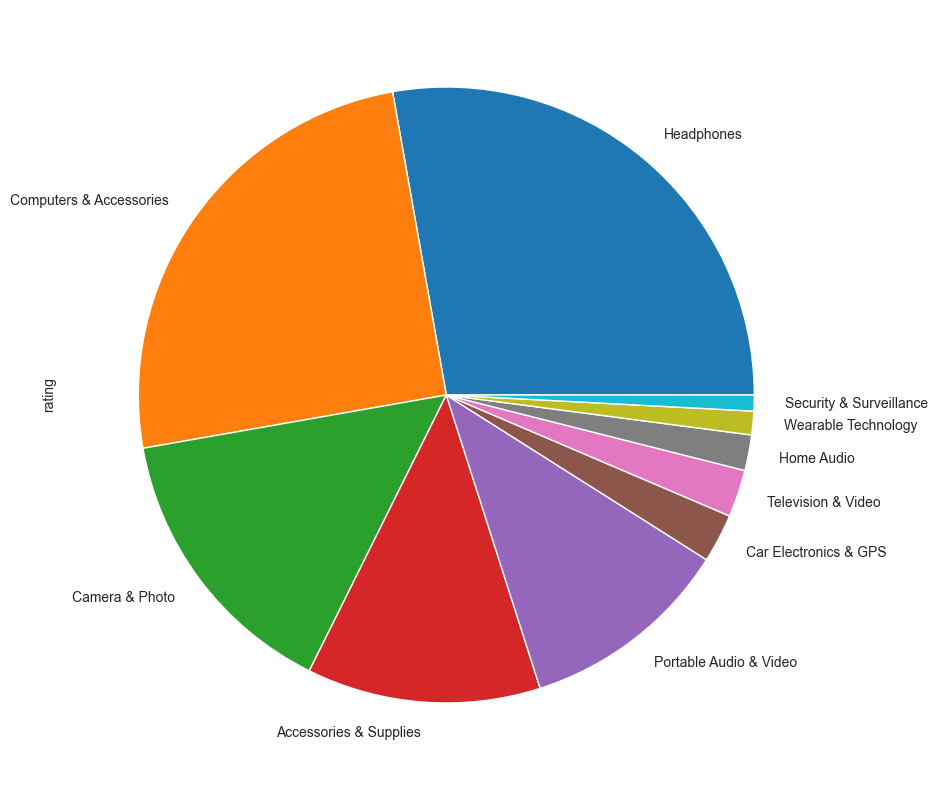

In [40]:
##understand with piechart
plt.figure(figsize=(10,10)) 
sns.set_style('white')
data.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')